In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.neural_network import MLPRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from geneticalgorithm import geneticalgorithm as ga 

In [11]:
np.random.seed(42) 
X = np.random.uniform(low=[160, 5, 10], high=[200, 20, 30], size=(100, 3)) 
y = ( 
    0.1 * (200 - X[:, 0]) +  # lower temp -> higher moisture 
    0.05 * (20 - X[:, 1]) +  # lower feed rate -> more drying 
    0.03 * (30 - X[:, 2]) +  # lower solids -> more moisture 
    np.random.normal(0, 0.5, 100)  # some noise 
)

In [12]:
 
# Normalize features 
scaler = MinMaxScaler() 
X_scaled = scaler.fit_transform(X) 
 
# Split into train and valida on 
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

 The best solution found:                                                                           
 [198.78430907  10.78396389  18.94923677]

 Objective function:
 1.0446385533458562


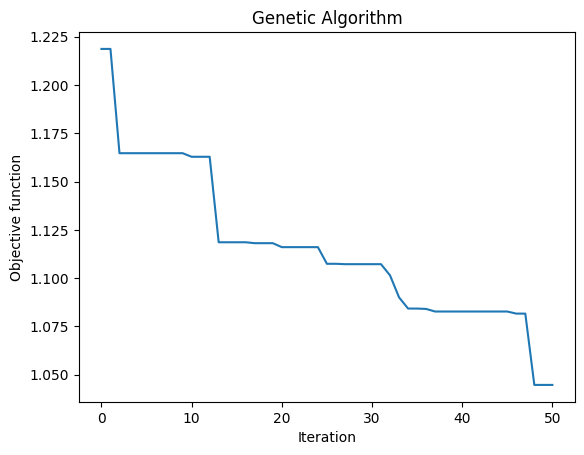


 Opmized Input Parameters (GA result):
Inlet Temp: 198.78 °C
Feed Rate: 10.78 L/h
Solids Content: 18.95 %
Predicted Moisture Content: 1.0446


In [14]:
 
model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=1) 
model.fit(X_train, y_train) 
def objective_function(x): 
    # Normalize input 
    x_scaled = scaler.transform([x]) 
    prediction = model.predict(x_scaled)[0] 
    return prediction  # minimize moisture content 
varbound = np.array([[160, 200], [5, 20], [10, 30]]) 
algorithm_params = { 
    'max_num_iteration': 50, 
    'population_size': 15, 
    'mutation_probability': 0.1, 
    'elit_ratio': 0.01, 
    'crossover_probability': 0.9, 
    'parents_portion': 0.3, 
    'crossover_type': 'uniform', 
    'max_iteration_without_improv': None 
} 
model_ga = ga( 
    function=objective_function, 
    dimension=3, 
    variable_type='real', 
    variable_boundaries=varbound, 
    algorithm_parameters=algorithm_params 
) 
model_ga.run() 
best_input = model_ga.output_dict['variable'] 
best_prediction = model_ga.output_dict['function'] 
print("\n Opmized Input Parameters (GA result):") 
print(f"Inlet Temp: {best_input[0]:.2f} °C") 
print(f"Feed Rate: {best_input[1]:.2f} L/h") 
print(f"Solids Content: {best_input[2]:.2f} %") 
print(f"Predicted Moisture Content: {best_prediction:.4f}")